In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_excel('C:\\Users\\vishw\\excelr drive files\\Assignments questions of excelr\\Forecasting\\CocaCola_Sales_Rawdata.xlsx')
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
data.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [6]:
data.shape

(42, 2)

# Boxplot

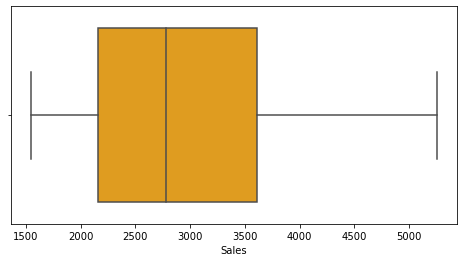

In [7]:
plt.figure(figsize=(8,4))
sns.boxplot("Sales",data=data,color='orange')
plt.show()

# Moving average of the time series for the better understanding of trend character in amtrak

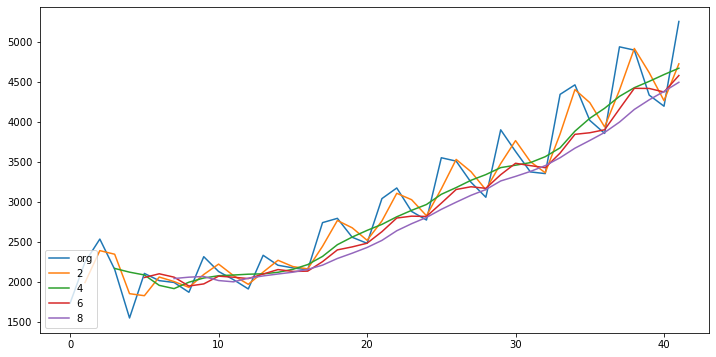

In [8]:
data.Sales.plot(label='org',figsize=(12,6))
for i in range(2,10,2):
    data['Sales'].rolling(i).mean().plot(label=str(i))
    plt.legend(loc=3)

# ACF plots and PACF plots 

In [9]:
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models

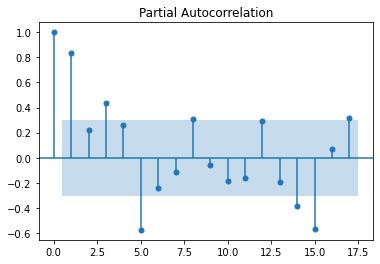

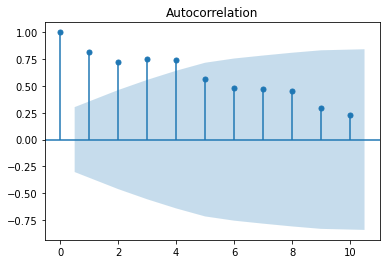

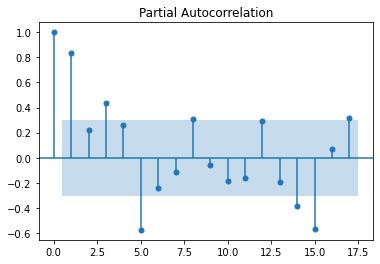

In [39]:
tsa_plots.plot_acf(data.Sales,lags=10)
tsa_plots.plot_pacf(data.Sales)

In [11]:
Train=data.head(48)
Test=data.tail(12)

# Creating a function to calculate the MAPE value of test data 

In [12]:
def MAPE(pred,org):
    temp=np.abs((pred-org))*100/org
    return np.mean(temp)

# Simple Exponential Method

In [13]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [14]:
ses_model=SimpleExpSmoothing(Train['Sales']).fit()
pred_ses=ses_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_ses,Test.Sales)

9.68200492651463

# Holt Method

In [18]:
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
hlt_model=Holt(Train["Sales"]).fit()
pred_hlt=hlt_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_hlt,Test.Sales)

11.025182440957998

# Holts winter exponential smoothing with additive seasonality and additive trend.

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hlt_win_model=ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hlt_win_model=hlt_win_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_hlt_win_model,Test.Sales)

3.245837019668915

# Holts winter exponential smoothing with multiplicative seasonality and additive trend.

In [21]:
hlt_mult_model=ExponentialSmoothing(Train['Sales'],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hlt_mult_model=hlt_mult_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_hlt_mult_model,Test.Sales)

2.8845556504947196

# Visualization of Forecasted values for Test data set using different methods. 

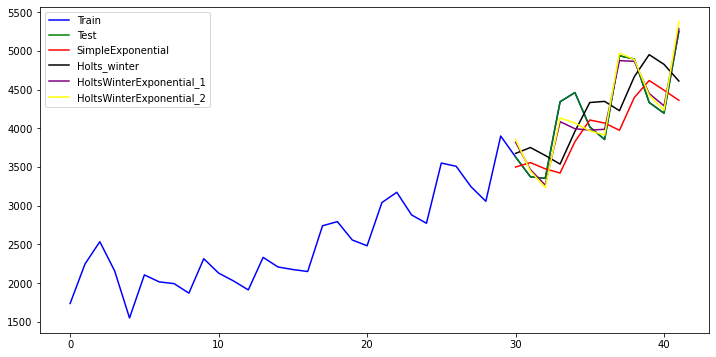

In [46]:
plt.figure(figsize=(12,6))
plt.plot(Train.index, Train["Sales"], label='Train',color="blue")
plt.plot(Test.index, Test["Sales"], label='Test',color="green")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="red")
plt.plot(pred_hlt.index, pred_hlt, label='Holts_winter',color="black")
plt.plot(pred_hlt_win_model.index,pred_hlt_win_model,label="HoltsWinterExponential_1",color="purple")
plt.plot(pred_hlt_mult_model.index,pred_hlt_mult_model,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')